## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.136300  0.263755  0.604637  1.139794  1.348499  1.664755
1  0.298378  0.058476 -1.432270  0.099935 -0.487396  0.887093
2 -1.386815  0.245184 -0.806483  0.063085 -1.719614 -1.223439
3  1.306214 -1.289687 -1.601050 -0.998921  1.638177  0.123753
4  0.371162  0.300867 -1.568385 -0.379440 -0.444933  0.905456


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9806692	total: 68.9ms	remaining: 1m 8s
1:	learn: 0.9714656	total: 69.6ms	remaining: 34.7s
2:	learn: 0.9606706	total: 70.3ms	remaining: 23.4s
3:	learn: 0.9509383	total: 70.8ms	remaining: 17.6s
4:	learn: 0.9419678	total: 71.5ms	remaining: 14.2s
5:	learn: 0.9341475	total: 72.2ms	remaining: 12s
6:	learn: 0.9235097	total: 72.7ms	remaining: 10.3s
7:	learn: 0.9163316	total: 73.3ms	remaining: 9.08s
8:	learn: 0.9071885	total: 73.8ms	remaining: 8.12s
9:	learn: 0.8978627	total: 74.3ms	remaining: 7.35s
10:	learn: 0.8881542	total: 74.8ms	remaining: 6.72s
11:	learn: 0.8789153	total: 75.3ms	remaining: 6.2s
12:	learn: 0.8706486	total: 75.8ms	remaining: 5.76s
13:	learn: 0.8634586	total: 76.5ms	remaining: 5.39s
14:	learn: 0.8563283	total: 76.9ms	remaining: 5.05s
15:	learn: 0.8489150	total: 77.4ms	remaining: 4.76s
16:	learn: 0.8416311	total: 77.8ms	remaining: 4.5s
17:	learn: 0.8339699	total: 78.3ms	remaining: 4.27s
18:	learn: 0.8253811	total: 78.7ms	remaining: 4.

80:	learn: 0.4781632	total: 108ms	remaining: 1.22s
81:	learn: 0.4740934	total: 108ms	remaining: 1.21s
82:	learn: 0.4705866	total: 109ms	remaining: 1.2s
83:	learn: 0.4659786	total: 109ms	remaining: 1.19s
84:	learn: 0.4619271	total: 109ms	remaining: 1.18s
85:	learn: 0.4581350	total: 110ms	remaining: 1.17s
86:	learn: 0.4537740	total: 110ms	remaining: 1.15s
87:	learn: 0.4499277	total: 110ms	remaining: 1.14s
88:	learn: 0.4456670	total: 111ms	remaining: 1.13s
89:	learn: 0.4425007	total: 111ms	remaining: 1.13s
90:	learn: 0.4387448	total: 112ms	remaining: 1.11s
91:	learn: 0.4350319	total: 112ms	remaining: 1.1s
92:	learn: 0.4317712	total: 112ms	remaining: 1.1s
93:	learn: 0.4278760	total: 113ms	remaining: 1.09s
94:	learn: 0.4244662	total: 113ms	remaining: 1.08s
95:	learn: 0.4208313	total: 114ms	remaining: 1.07s
96:	learn: 0.4178909	total: 114ms	remaining: 1.06s
97:	learn: 0.4147506	total: 115ms	remaining: 1.06s
98:	learn: 0.4114998	total: 115ms	remaining: 1.05s
99:	learn: 0.4089762	total: 116ms	

251:	learn: 0.1433143	total: 187ms	remaining: 556ms
252:	learn: 0.1425264	total: 188ms	remaining: 555ms
253:	learn: 0.1416850	total: 188ms	remaining: 553ms
254:	learn: 0.1406826	total: 189ms	remaining: 551ms
255:	learn: 0.1397015	total: 189ms	remaining: 549ms
256:	learn: 0.1388885	total: 189ms	remaining: 548ms
257:	learn: 0.1378600	total: 190ms	remaining: 546ms
258:	learn: 0.1370049	total: 191ms	remaining: 545ms
259:	learn: 0.1360300	total: 191ms	remaining: 543ms
260:	learn: 0.1349747	total: 192ms	remaining: 542ms
261:	learn: 0.1343439	total: 192ms	remaining: 541ms
262:	learn: 0.1336400	total: 192ms	remaining: 539ms
263:	learn: 0.1326645	total: 193ms	remaining: 538ms
264:	learn: 0.1317845	total: 193ms	remaining: 536ms
265:	learn: 0.1309896	total: 194ms	remaining: 535ms
266:	learn: 0.1302350	total: 194ms	remaining: 533ms
267:	learn: 0.1294606	total: 195ms	remaining: 531ms
268:	learn: 0.1287617	total: 195ms	remaining: 530ms
269:	learn: 0.1281365	total: 195ms	remaining: 528ms
270:	learn: 

469:	learn: 0.0450475	total: 291ms	remaining: 329ms
470:	learn: 0.0448562	total: 292ms	remaining: 328ms
471:	learn: 0.0446037	total: 292ms	remaining: 327ms
472:	learn: 0.0444241	total: 293ms	remaining: 326ms
473:	learn: 0.0441779	total: 293ms	remaining: 325ms
474:	learn: 0.0439374	total: 294ms	remaining: 325ms
475:	learn: 0.0437025	total: 294ms	remaining: 324ms
476:	learn: 0.0435100	total: 295ms	remaining: 323ms
477:	learn: 0.0432809	total: 295ms	remaining: 322ms
478:	learn: 0.0430571	total: 296ms	remaining: 321ms
479:	learn: 0.0428385	total: 296ms	remaining: 321ms
480:	learn: 0.0426250	total: 296ms	remaining: 320ms
481:	learn: 0.0424068	total: 297ms	remaining: 319ms
482:	learn: 0.0421961	total: 297ms	remaining: 318ms
483:	learn: 0.0419613	total: 298ms	remaining: 317ms
484:	learn: 0.0417505	total: 298ms	remaining: 317ms
485:	learn: 0.0415446	total: 299ms	remaining: 316ms
486:	learn: 0.0413433	total: 299ms	remaining: 315ms
487:	learn: 0.0412635	total: 300ms	remaining: 315ms
488:	learn: 

643:	learn: 0.0219437	total: 370ms	remaining: 205ms
644:	learn: 0.0219253	total: 371ms	remaining: 204ms
645:	learn: 0.0219071	total: 371ms	remaining: 204ms
646:	learn: 0.0218164	total: 372ms	remaining: 203ms
647:	learn: 0.0217917	total: 372ms	remaining: 202ms
648:	learn: 0.0217738	total: 373ms	remaining: 202ms
649:	learn: 0.0216847	total: 373ms	remaining: 201ms
650:	learn: 0.0216605	total: 373ms	remaining: 200ms
651:	learn: 0.0216430	total: 374ms	remaining: 200ms
652:	learn: 0.0215893	total: 375ms	remaining: 199ms
653:	learn: 0.0214855	total: 375ms	remaining: 198ms
654:	learn: 0.0213546	total: 376ms	remaining: 198ms
655:	learn: 0.0212686	total: 376ms	remaining: 197ms
656:	learn: 0.0211788	total: 376ms	remaining: 197ms
657:	learn: 0.0211467	total: 377ms	remaining: 196ms
658:	learn: 0.0210554	total: 377ms	remaining: 195ms
659:	learn: 0.0209556	total: 378ms	remaining: 195ms
660:	learn: 0.0208443	total: 378ms	remaining: 194ms
661:	learn: 0.0207354	total: 379ms	remaining: 193ms
662:	learn: 

861:	learn: 0.0112170	total: 475ms	remaining: 76ms
862:	learn: 0.0111673	total: 475ms	remaining: 75.5ms
863:	learn: 0.0111190	total: 476ms	remaining: 74.9ms
864:	learn: 0.0110704	total: 476ms	remaining: 74.3ms
865:	learn: 0.0110229	total: 477ms	remaining: 73.8ms
866:	learn: 0.0109700	total: 477ms	remaining: 73.2ms
867:	learn: 0.0109236	total: 478ms	remaining: 72.7ms
868:	learn: 0.0108828	total: 478ms	remaining: 72.1ms
869:	learn: 0.0108374	total: 479ms	remaining: 71.5ms
870:	learn: 0.0107999	total: 479ms	remaining: 71ms
871:	learn: 0.0107635	total: 480ms	remaining: 70.4ms
872:	learn: 0.0107498	total: 480ms	remaining: 69.8ms
873:	learn: 0.0107363	total: 480ms	remaining: 69.3ms
874:	learn: 0.0106918	total: 481ms	remaining: 68.7ms
875:	learn: 0.0106426	total: 481ms	remaining: 68.1ms
876:	learn: 0.0106347	total: 482ms	remaining: 67.6ms
877:	learn: 0.0105910	total: 482ms	remaining: 67ms
878:	learn: 0.0105738	total: 483ms	remaining: 66.5ms
879:	learn: 0.0105210	total: 483ms	remaining: 65.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

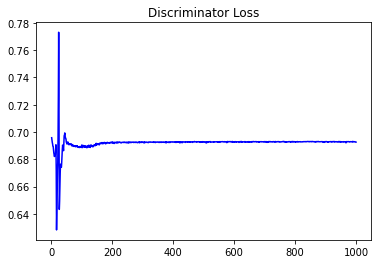

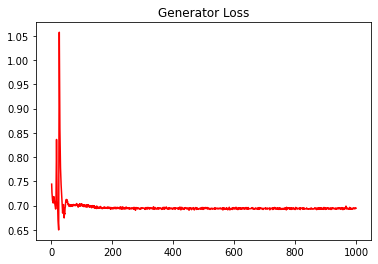

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11682718915486547


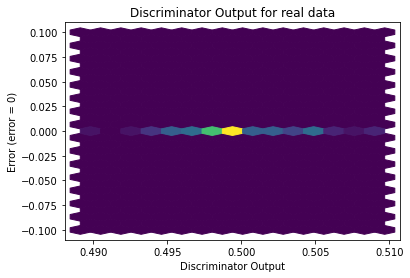

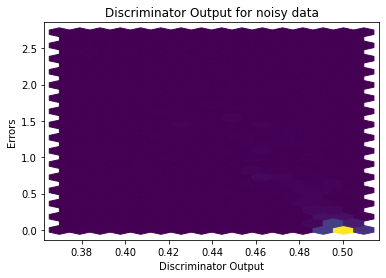

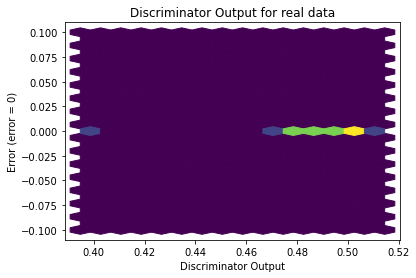

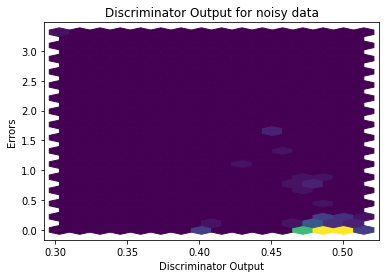

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


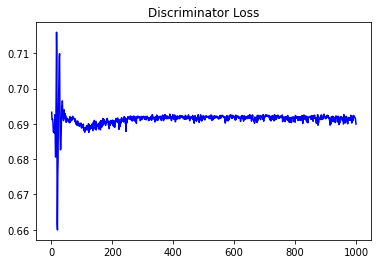

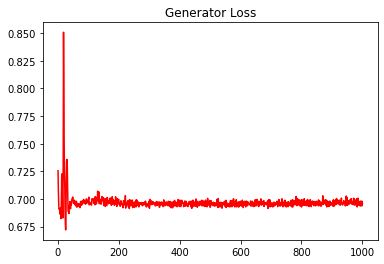

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12156645988124984


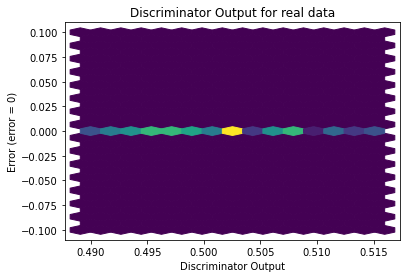

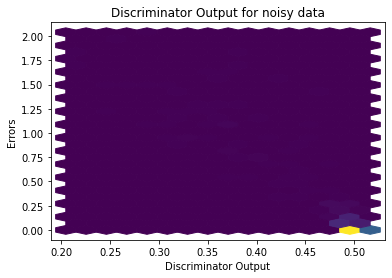

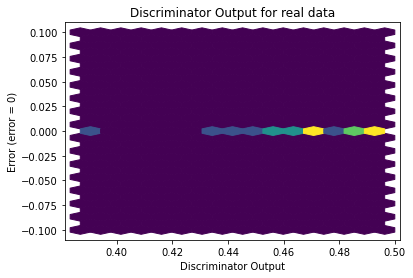

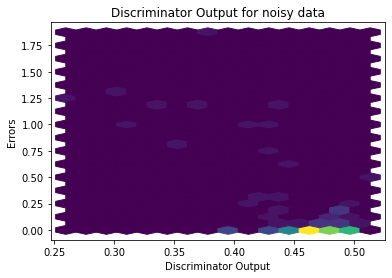

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6250]], requires_grad=True)
